# Model Optimization- SVC Linear

Lets first see what parameters could possibly be tuned

In [1]:
from sklearn.svm import SVC

clf = SVC()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 14 parameters for the Logistic Model.  The Default values are:
                        C:   1.0
               cache_size:   200
             class_weight:   None
                    coef0:   0.0
  decision_function_shape:   ovr
                   degree:   3
                    gamma:   auto
                   kernel:   rbf
                 max_iter:   -1
              probability:   False
             random_state:   None
                shrinking:   True
                      tol:   0.001
                  verbose:   False


In [4]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-09 22:43:45.413377] Starting tuning classifier__C
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    9.5s finished


Best parameters set found on development set:

{'classifier__C': 1.4630333879366948}


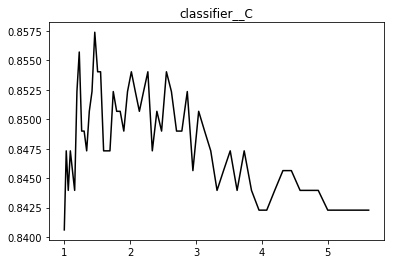

[2018-07-09 22:43:55.315831] Done with tuning classifier__C (Took 0.150 minutes)


In [10]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
import numpy as np

# parameters and ranges to plot
param_grid = {
    "classifier__C": np.logspace(0, 0.75, 60)
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', SVC(random_state = 84))
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)